In [2]:
import numpy as np, sympy as smp, matplotlib.pyplot as plt, plotly.graph_objects as go
from scipy.integrate import quad
from IPython.display import HTML

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The Biot-Savart Law tells us the Magnetic Field for any configuration carrying a Steady Current $I$ located at $\vec{\mathscr R}$ at a point P located at $\vec r$ in $\mathbb R^3$ as $$\vec B(\vec r)=\frac{\mu_0I}{4\pi}\int_C\frac{d\vec{\mathscr L} \times (\vec r-\vec{\mathscr R})}{\|\vec r-\vec{\mathscr R}\|^3}$$ 

Consider a Loop in the $x$-$y$ plane as $$\vec{\mathscr L}(t)=R\,\bigg[e^{\cos(t)}-2\cos(4t)-\sin^5\bigg(\frac t{12}\bigg)\bigg]\cdot\langle\sin(t),\cos(t),0\rangle$$ for a charachteristic length $R$ and $t\in[0,2\pi].$ The Biot-Savart Law can be written for our purpose as $$\frac{4\pi R}{\mu_0I}\vec B(\vec r)=\int_C \frac{d\vec l/dt\times(\vec r-\vec{\mathscr R})}{\|\vec r-\vec{\mathscr R}\|^3}dt$$

In [3]:
t = np.linspace(0, 12 * np.pi, 1000)

def L(t):
    return (np.exp(np.cos(t)) - 2 * np.cos(4 * t) - np.sin(t / 12) ** 5) * np.array([np.sin(t), np.cos(t), np.zeros(len(t))])

Lx, Ly, Lz = L(t)

The Loop is

Text(0, 0.5, '$y/R$')

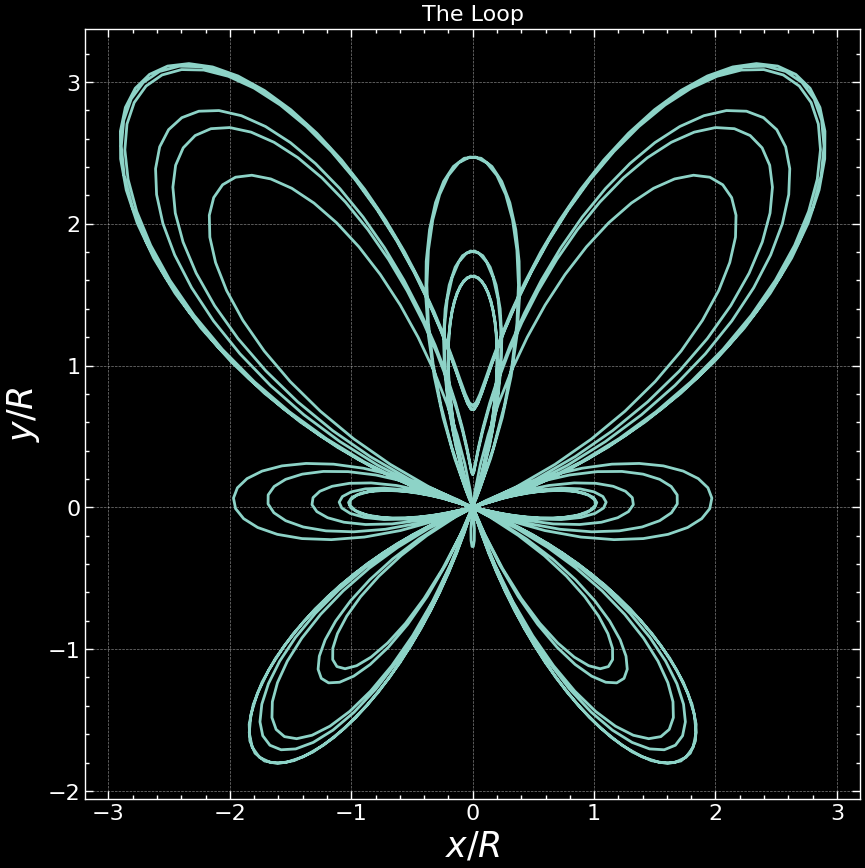

In [4]:
plt.figure(figsize = (10, 10))
plt.plot(Lx, Ly)

plt.title(r'The Loop')
plt.xlabel(r'$x/R$', fontsize = 25)
plt.ylabel(r'$y/R$', fontsize = 25)

In [5]:
t, x, y, z = smp.symbols('t x y z')

L = (smp.exp(smp.cos(t)) - 2 * smp.cos(4 * t) - smp.sin(t / 12) ** 5) * smp.Matrix([smp.sin(t), smp.cos(t), 0])
r = smp.Matrix([x, y, z])

sep = r - L
sep

Matrix([
[x - (exp(cos(t)) - sin(t/12)**5 - 2*cos(4*t))*sin(t)],
[y - (exp(cos(t)) - sin(t/12)**5 - 2*cos(4*t))*cos(t)],
[                                                   z]])

In [6]:
integrand = smp.diff(L, t).cross(sep) / sep.norm() ** 3

dBx_dt = smp.lambdify([t, x, y, z], integrand[0])
dBy_dt = smp.lambdify([t, x, y, z], integrand[1])
dBz_dt = smp.lambdify([t, x, y, z], integrand[2])

In [7]:
def B(x, y, z):
    return np.array([quad(dBx_dt, 0, 2 * np.pi, args = (x, y, z))[0], quad(dBy_dt, 0, 2 * np.pi, args = (x, y, z))[0], quad(dBz_dt, 0, 2 * np.pi, args = (x, y, z))[0]])

x = np.linspace(-2, 2, 20)
xv, yv, zv = np.meshgrid(x, x, x)

In [15]:
field = np.vectorize(B, signature = '(),(),()->(n)')(xv, yv, zv)

Bx = field[:,:,:,0]
By = field[:,:,:,1]
Bz = field[:,:,:,2]

C:\Users\DELL\AppData\Local\Temp\ipykernel_15800\502531185.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return np.array([quad(dBx_dt, 0, 2 * np.pi, args = (x, y, z))[0], quad(dBy_dt, 0, 2 * np.pi, args = (x, y, z))[0], quad(dBz_dt, 0, 2 * np.pi, args = (x, y, z))[0]])


In [18]:
data = go.Cone(x = xv.ravel(), y = yv.ravel(), z = zv.ravel(),
               u = Bx.ravel(), v = By.ravel(), w = Bz.ravel(),
               colorscale = 'Inferno', colorbar = dict(title = r'$x^2$'),
               sizemode = 'absolute', sizeref = 20)

layout = go.Layout(title = r'Magnetic Field of the Loop', scene = dict(xaxis_title = r'x', yaxis_title = r'y', zaxis_title = r'z', 
                   aspectratio = dict(x = 1, y = 1, z = 1), camera_eye = dict(x = 1.2, y = 1.2, z = 1.2)))

fig = go.Figure(data = data, layout = layout)
fig.layout.template = 'plotly_dark'
fig.add_scatter3d(x = Lx, y = Ly, z = Lz, mode = 'lines', line = dict(color = 'green', width = 10))

fig.write_html('../Outputs/mag_field.html')
fig.show()